In [1]:
import numpy as np 
from matplotlib import pyplot as plt
import pandas as pd
import scipy as sci
from scipy import stats

# Theoretical Background
$$\newcommand{\ket}[1]{\left|{#1}\right\rangle}$$
$$\newcommand{\bra}[1]{\left\langle{#1}\right|}$$
$$\newcommand{\braket}[2]{\left\langle{#1}\middle|{#2}\right\rangle}$$


A central problem in quantum mechanics is the following: what's the probability amplitude that the following will happen: $(x_a,t_a) \rightarrow (x_b,t_b)$? This problem is usually described in the following form:

$$\psi(x_b,t_b) = \int G(x_a,t_a;x_b, t_b)\psi(x_a,t_a)dx_a$$

Where $G$ is a green's function that represents the _propagator_ of the system. A system is said to be fully solved once you have the propagator. For the typical schrodinger picture, it looks a bit like this


$$G = \frac{1}{i\hbar}\Theta(t_b - t_a)K(x_a,t_a;x_b, t_b)$$

with $\Theta$ being the Heaviside step function and $K$ being the _kernel_ of the SE (kernel and propagator are sometimes used interchangably). 

A simple case is the free particle $V(x) = 0$ where the g.f is equivalent to

$$G(b,a) = \sqrt{\frac{m}{2\pi\hbar i (t_b - t_a)}}e^{\frac{im(x_b - x_a)^2}{2\hbar (t_b - t_a)}}$$


This seems a bit unintuitive, so a physicist named Richard Feynman sought out to find a different (yet, obviously equivilent) formulation, which can be motivated as follows: 

Consider the action functional ($F: f(x)\rightarrow g(x)$) $S[x,\dot{x}] = \int_{t_a}^{t_b} dt L[x,\dot{x}]$ of a free particle, which is known for taking the following form:

$$S[b,a] = \frac{m(x_b - x_a)^2}{2(t_b - t_a)}$$


Looking at the Green function for a free particle above, one can relate the two as follows:

$$G = \sqrt{\frac{m}{2\pi\hbar i (t_b - t_a)}}e^{iS/\hbar}$$


i.e a quantum system's propagator could be related to its action (and equivilently, its lagrangian). Feynman considered a generalization of this as

$$G(b,a) = \sum_{paths}e^{iS[b,a]/\hbar}$$

In other words, you can describe the amplitude of a particle going from a point in spacetime to another point in space time by considering every possible path (straight line, zig-zag, dancing around in time, etc) and summing all of their amplitudes! This is called the _sum over histories approach_ because you're considering every possible trajectory from $(x_a,t_a) \rightarrow (x_b, t_b)$

### Example: Free Particle

Consider a quantum system such that $V(x) = 0$. Our task is to solve get the Wavefunction of this system without resorting to any quantum operators (most notably $\hat{H}$). 

The first step is writing down the system's Action:

$$S = \int_{t_a}^{t_b}dt (T - V) \\ = \int_{t_a}^{t_b}dt T$$

which is simply

$$S = \int_{t_a}^{t_b}dt \frac{m}{2}\dot{x}^2$$

Given that there's no time-dependence, and also that $F = -\frac{dV(x)}{dx} = 0$, we see that the action is

$$S[b,a] = \frac{m(x_b - x_a)^2}{2(t_b - t_a)}$$

as mentioned above, this solution allows us to write the Green's Function as

$$G(b,a) = \frac{e^{iS/\hbar}}{\sqrt{2\pi i (t_b - t_a)}} $$



### Example: Harmonic Oscillator


V ~ x^2







# Numerical Methods

As described in the _Theoretical Background_ section, path integrals involve summing up an infinite set of complex exponentials with integrals on all space. One should directly see that this is not computationally feasable to do in its raw form. For this reasons, a set of assumputions and tricks must be done to approximate the solution to path integral methods. 


### Spacetime Lattice
Firstly, we assume spacetime to be a lattice. In other words we descretize $x$ and $t$ and consider descrete "jumps". The figure bellow makes this more clear.


<img src="assets/l (1).png" width=400>

We now define a path as a set of connected lines from $t_i$ to $t_{i+1}$, called _links_. The following represents a link by a pink line: 

<img src="assets/link.jpeg" width=250>

In other words, we assume a fixed time interval $\epsilon$ and a trajectory is described as the link between a set of points between $t = 0$ and $t = N\epsilon$

### Euler's Rule

Reading the theoretical background, one can likely tell that there will be some derivatives and integrals involved. Because we are, to a certain extent, laxed with the amount of precision necessary (mainly because the precision is most dependent on the number of paths considered + contribution of the paths considered), we may use linearizations such as describing the "velocity" by:

$$\frac{dx_i}{dt} \approx \frac{x_j - x_{j-1}}{\epsilon}$$

And describing the action by: 
$$S_j \approx L_j\Delta t \approx \frac{m\Delta x}{2\epsilon} - V(x_j)$$

We then sum up every _link action_ $S_j$ for a path and that gives us the _path action_.


### Wick Rotation

Remember from the theoretical section that $G(b,a) \leftrightarrow \sum_{a - b} paths$ or more specifically

$$G(b,a) = \int dx_1\dots dx_{N-1}e^{iS[b,a]}$$

which has an exponential of a complex number... we don't like integrating those, they take too much time and that's if they don't diverge. A work around is by applying a _Wick Rotation_ which performs the following transformations:

$$t \rightarrow -i\tau$$
$$L \rightarrow -H$$

(effectively "rotating" the lagrangian into the hamiltonian). 

That being said, we can get the Green's function for all $x,t$ by

$$G(x,t;x_0,t_0) = ⨋ dx_1\dots dx_{N-1} e^{iS[x,x0]}$$

$⨋$ means we're $\sum$ing on all paths and $\int$ing on all space. 

Because we're using Euler's method, $S[x,x_0]$ is described as 

$$S[x,x_0] = \sum_{j=1}^{N-1}L(x_j, \dot{x}_j)$$

where 

$L = T - V(x)$ and $L(x,\frac{dx}{-id\tau}) = -H$. As a result, we can finally write the path action as

$$G(x,-i\tau;x_0,0) = \int x_1\dots x_{N-1}e^{-\int_{0}^\tau H(\tau')d\tau'}$$

which, due to our discretization, reduces down to

$$\int H d\tau = \sum_{j}\epsilon E_j = \epsilon \mathcal{E}$$

where $\mathcal{E}$ is the average path energy.

### Estimating the ground state probability density

A common task in computational quantum mechanics is estimating $|\psi_0(x)|^2$ of some system. We can do that with path integrals by using the following:


$$|\psi_0(x)|^2 = \frac{1}{Z}\lim_{\tau \rightarrow \infty} \int_{paths} dx_1\dots dx_{N-1}e^{\epsilon \mathcal{E}}$$

where $Z = \int G(x,-i\tau ; x_0,0)$ plays the role of the partition function (idk what that means, Alejandro said its the expectation value of the time evolution operator after a wick rotation but make sure to ask in tutorial).

### Time Saving Trick

Our end goal in this notebook is to estimate $|\psi_0(x)|^2$, which seems to involve a heavy amount of integration. To save time, we do the following trick:

$$|\psi_0(x)|^2 = \int dx_1\dots dx_{N} e^{-\epsilon \mathcal{E}} = dx_1\dots dx_{N} e^{-\epsilon \mathcal{E}}\delta(x-x_0)$$

### Summary of Facts

 - Propagator $(t_a \rightarrow t_b)$ is $G = $ path integral$\sum_{paths}\int_{space}$
 - Path integral = sum of all trajectories on x-t lattice
 - Hamilton: extremum $S \rightarrow$ path integration of $H$
 - Paths weight with probability $e^{-iS/h}$
 - Algo: $\Delta$pathlink $\rightarrow$ $\Delta E$ (like ising)
 - $\psi$ equilibriates to the ground state
 


<hr>
 
We now have enough information to come up with a numerical method to compute, say, the ground state of a system $V(x)$ by using path integrals. It is only a matter of generating an extremely large number of paths. The only problem with that is that unless we come up with an efficient way to produce highly contributing paths, we would need an extremely large amount of time and computing power to come up with something accurate. As a concequence, we resort to something like the metropolis algorithm.

### The Metropolis Algorithm

The first assumption we make is that the paths are markov chains. That is, 

$$P(X_{t_n} \in B | X_{t_1} = x_{t_1}, \dots, X_{t_{n-1}} = x_{t_{n-1}}) = P(X_{t_n} \in B | X_{t_{n-1}} = x_{t_{n-1}})$$

or in simpler terms, the probability distribution of the next event $X_{t+1}$ is only dependent on the current event $X_t$. The general algorithm goes as follows:

 1. Consider a cold path (i.e $x_t = 0 \forall t$)
 2. Pertube any point in the path $x_j$ by a small number
 3. Calculate the change in the link action $\epsilon\Delta\mathcal{E}$
 4. We retain the path if
     1. $\epsilon\Delta\mathcal{E} <0$ or
     2. if not, we draw a random number $r \sim U(0,1)$ and if $r < e^{-\epsilon\Delta \mathcal{E}}$, we keep the new path
 5. If A or B are not satisfied, then we move on to the next lattice point
 6. Do this a very large number of times
 
 
In our implementation, we take a cold path, _thermalize_ it, have the thermalized path go through this sequence several times, then get the distribution. Once we normalize that, we get $|\psi_0(x)|^2$!

In [2]:
import random

##give MC_sweep credits when you find the guy

S = lambda V,x1,x2,x: 0.5 * ( (x1 - x)**2 + (x2 - x)**2) + V(x) 

def metro(path0,h,V):
    Ntau = len(path0)
    accept_rate = 0
    path = path0

    index = np.arange(0,Ntau,1)
    random.shuffle(index)
    
    for i in range(Ntau):
        t = index[i]
        tmin = (t + Ntau - 1)% Ntau  # periodic boundary conditions
        tplu = (t + 1) % Ntau 
        x_new = path[t] + h * (random.random() - 0.5)
        S_old = S(V,path[tplu],path[tmin],path[t])
        S_new = S(V,path[tplu],path[tmin],x_new)
        if random.random() < np.exp( - (S_new - S_old) ):
            path[t] = x_new
            accept_rate += 1/Ntau
    h = h * accept_rate * 10
    return path, h

 

def thermalize(N, delta, V): 
    path = np.zeros(N)
    for i in range(100):
        path, delta = metro(path,delta,V)
    return path

def estimating_ground_state_prob_density(N, Niter, delta, V):
    res = []
    thermal = thermalize(N, delta, V)
    
    for i in range(Niter):
        h = delta
        path = thermal
        for j in range(int(N/10)):
            path, h = metro(path,h,V)
        res.append(list(path))
    return np.array(res).flatten()





### Example: Harmonic Oscillator $m = \omega = \hbar = 1$

In [3]:
V_Harm = lambda pos: 0.5*pos**2
a = estimating_ground_state_prob_density(120,1000,0.1,V_Harm)


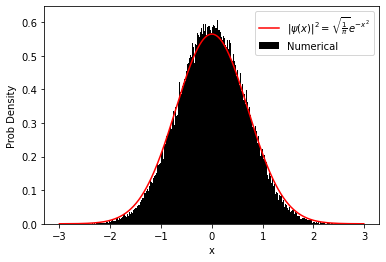

In [4]:
plt.hist(a,density=True, bins=500, color='black',label='Numerical')

x = np.arange(-3,3,0.01)
psi0 = np.exp(-x**2) * np.sqrt(1/np.pi)

plt.plot(x,psi0,color='red',label=r'$|\psi(x)|^2 = \sqrt{\frac{1}{\pi}}e^{-x^2}$')
plt.xlabel('x')
plt.ylabel('Prob Density')
plt.legend()
plt.savefig(dpi=500,fname='finalresult')
plt.show()

### Example: Free Particle, $V(x) = 0$

In [5]:
free_particle = lambda pos: 0
a = estimating_ground_state_prob_density(120,1000,0.1,free_particle)

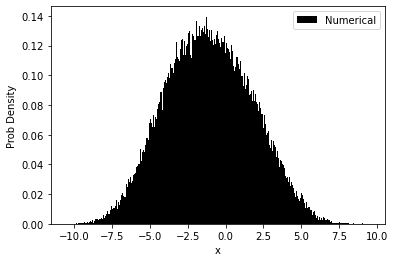

In [6]:
plt.hist(a,density=True, bins=500, color='black',label='Numerical')

plt.xlabel('x')
plt.ylabel('Prob Density')
plt.legend()
plt.savefig(dpi=500,fname='finalresult')
plt.show()

It should be gaussian too. Wf is something like $e^{i(kx - \omega t)}$

## References

[1]

[2]

## Playing Area

In [9]:
pip install vegas

Note: you may need to restart the kernel to use updated packages.


In [10]:
from vegas import Integrator

In [11]:
import vegas
import math

def f(x):
    dx2 = 0
    for d in range(4):
        dx2 += (x[d] - 0.5) ** 2
    return math.exp(-dx2 * 100.) * 1013.2118364296088

integ = vegas.Integrator([[-1, 1], [0, 1], [0, 1], [0, 1]])

result = integ(f, nitn=10, neval=1000)
print(result.summary())
print('result = %s    Q = %.2f' % (result, result.Q))

itn   integral        wgt average     chi2/dof        Q
-------------------------------------------------------
  1   0.37(22)        0.37(22)            0.00     1.00
  2   1.07(17)        0.80(14)            6.40     0.01
  3   1.095(86)       1.010(73)           4.91     0.01
  4   0.854(46)       0.899(39)           4.38     0.00
  5   1.014(36)       0.961(26)           4.47     0.00
  6   1.004(26)       0.982(19)           3.84     0.00
  7   0.977(19)       0.979(13)           3.21     0.00
  8   1.001(16)       0.988(10)           2.90     0.00
  9   1.002(13)       0.9935(81)          2.62     0.01
 10   1.000(12)       0.9957(67)          2.36     0.01

result = 0.9957(67)    Q = 0.01


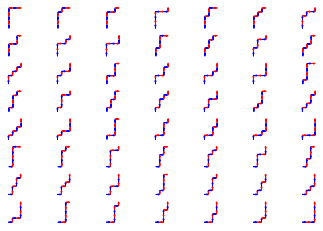

In [12]:
import itertools

allPaths = [ "".join( x ) for x in itertools.product( "NE", repeat=8 )
             if x.count( "N" ) == 5 and x.count( "E" ) == 3 ]

import matplotlib.pyplot as plt

length = 0.18
width= 0.001
head_width = 0.05

def drawPath( ax, path ):
    x = 0.0 + head_width
    y = 0.0 + head_width
    color = "blue"
    
    ax.set_aspect('equal', 'box' )
    for d in path:
        if d == "N":
            dx = 0.0
            dy = length
        else:
            dx = length
            dy = 0.0
        ax.arrow( x, y, dx, dy,
                  width = width,
                  head_width = head_width,
                  color = color,
                  length_includes_head = True )
        x += dx
        y += dy
        if color == "blue":
            color = "red"
        else:
            color = "blue"

for i, p in enumerate( allPaths ):
    ax = plt.subplot( 8, 7, i + 1 )
    ax.axis( "off" )
    drawPath( ax, p )

plt.savefig(fname="pathnice", dpi=3000)
plt.show()

### Vegas thing

    1. Pick the following values: a = [-3,-2,-1,0,1,2,3]
    2. All possible paths from x to x for x in a
    3. Get the action of all paths
    4. Sum it all up

In [13]:
import vegas

In [14]:
def generate_paths(n):
    res = [[n, n + np.random.randint(-5,5),n + np.random.randint(-5,5),n + np.random.randint(-5,5),n] for i in range(10000)]
    return [ii for n,ii in enumerate(res) if ii not in res[:n]]

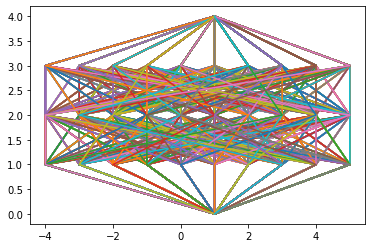

In [15]:
for i in generate_paths(1):
    plt.plot(i, range(5))

In [20]:
len(generate_paths(1))

def action_path(path, V):
    return sum([S(V,path[i],path[i+1],path[i+1]) for i in range(len(path)-1)])

def harmOsc(x):
    return 0.5*x**2

In [21]:
prob = lambda x: sum([np.exp(-action_path(i,harmOsc)) for i in generate_paths(x)])


In [22]:
boi = np.array([prob(i) for i in range(-3,4)])
boi = boi/sum(boi)

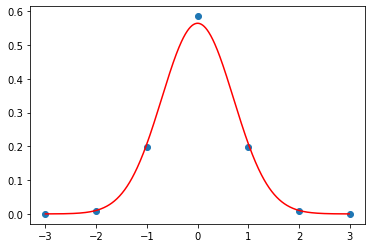

In [23]:
plt.scatter(range(-3,4),boi)
plt.plot(x,psi0,color='red',label=r'$|\psi(x)|^2 = \sqrt{\frac{1}{\pi}}e^{-x^2}$')


In [42]:
one_fey = boi[4]
one_schrod = psi0[400]

In [43]:
one_fey/one_schrod

0.9608657989728641